# <u><b> Objective </b></u>
## <b>To predict the whether a customer will churn or not, based on the variables available in the Telco customer churn data. </b>


### Logistic regression does not make many of the key assumptions of linear regression and general linear models that are based on ordinary least squares algorithms – particularly regarding linearity, normality, homoscedasticity, and measurement level.

### First, logistic regression does not require a linear relationship between the dependent and independent variables.  Second, the error terms (residuals) do not need to be normally distributed.  Third, homoscedasticity is not required.  Finally, the dependent variable in logistic regression is not measured on an interval or ratio scale.

### However, some other assumptions still apply.

### First, binary logistic regression requires the dependent variable to be binary and ordinal logistic regression requires the dependent variable to be ordinal.

### Second, logistic regression requires the observations to be independent of each other.  In other words, the observations should not come from repeated measurements or matched data.

### Third, logistic regression requires there to be little or no multicollinearity among the independent variables.  This means that the independent variables should not be too highly correlated with each other.

### Fourth, logistic regression assumes linearity of independent variables and log odds.  although this analysis does not require the dependent and independent variables to be related linearly, it requires that the independent variables are linearly related to the log odds.


### <b> In this assignment, you need to do the following : </b>

* ### Remove correlated variables and run Logistic Regression
* ### Also implement regularized logistic regression using the hyperparameter C in the sklearn implementation. Add details about how this hyperparameter affects the learning and performance of the model.
* ### Evaluate your logistic regression models using metrics such as roc_auc, log_loss, precision, recall, accuracy and f-score. You already know these metrics from your assignments in Module 1. Explain your observations about these metrics results.

In [1]:
# importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# data loading
# df = pd.read_csv("E:\\Data Science\\amlabetter\\Module 4\\Week 2\\Day 2\\WA_Fn-UseC_-Telco-Customer-Churn.csv")

df = pd.read_csv("/content/drive/MyDrive/Almabetter/Cohort Nilgiri/Module 4/Week 2/Day 2/WA_Fn-UseC_-Telco-Customer-Churn.csv")

In [4]:
# first look
pd.set_option('display.max_columns', None)
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [5]:
# checking null and non null columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [6]:
# summary
pd.set_option('display.max_columns', None)
df.describe(include="all" )

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
count,7043,7043,7043.000000,7043,7043,7043.000000,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043.000000,7043,7043
unique,7043,2,NaN,2,2,NaN,2,3,3,3,3,3,3,3,3,3,2,4,NaN,6531,2
top,7590-VHVEG,Male,NaN,No,No,NaN,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,NaN,,No
freq,1,3555,NaN,3641,4933,NaN,6361,3390,3096,3498,3088,3095,3473,2810,2785,3875,4171,2365,NaN,11,5174
mean,NaN,NaN,0.162147,NaN,NaN,32.371149,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,64.761692,NaN,NaN
std,NaN,NaN,0.368612,NaN,NaN,24.559481,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30.090047,NaN,NaN
min,NaN,NaN,0.000000,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.250000,NaN,NaN
25%,NaN,NaN,0.000000,NaN,NaN,9.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35.500000,NaN,NaN
50%,NaN,NaN,0.000000,NaN,NaN,29.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,70.350000,NaN,NaN
75%,NaN,NaN,0.000000,NaN,NaN,55.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,89.850000,NaN,NaN


In [7]:
# counts of churn and not churn
df['Churn'].value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

In [8]:
# data encoding : example : one hot encoding

# putting male = 1 and female = 0
df['gender'] = df['gender'].apply(lambda x : 1 if x == "Male" else 0)

# putting yes = 1 and no = 0
df['Partner'] = df['Partner'].apply(lambda x : 1 if x == "Yes" else 0)
df['Dependents'] = df['Dependents'].apply(lambda x : 1 if x == "Yes" else 0)

df['PhoneService'] = df['PhoneService'].apply(lambda x : 1 if x == "Yes" else 0)
df['MultipleLines'] = df['MultipleLines'].apply(lambda x : 1 if x == "Yes" else 0)

df['InternetService'] = df['InternetService'].apply(lambda x : 0 if x == "No" else(1 if x == "DSL" else 2))

df['OnlineSecurity'] = df['OnlineSecurity'].apply(lambda x : 1 if x == "Yes" else 0)

df['OnlineBackup'] = df['OnlineBackup'].apply(lambda x : 1 if x == "Yes" else 0)

df['DeviceProtection'] = df['DeviceProtection'].apply(lambda x : 1 if x == "Yes" else 0)

df['TechSupport'] = df['TechSupport'].apply(lambda x : 1 if x == "Yes" else 0)

df['StreamingTV'] = df['StreamingTV'].apply(lambda x : 1 if x == "Yes" else 0)

df['StreamingMovies'] = df['StreamingMovies'].apply(lambda x : 1 if x == "Yes" else 0)

df['PaperlessBilling'] = df['PaperlessBilling'].apply(lambda x : 1 if x == "Yes" else 0)

df['Churn'] = df['Churn'].apply(lambda x : 1 if x == "Yes" else 0)

Text(0, 0.5, 'Monthly Charges')

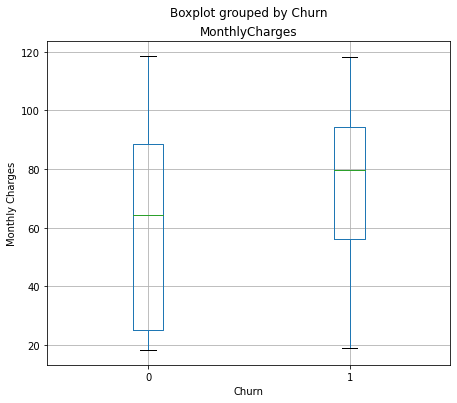

In [9]:
# checking churning range
ax = plt.figure(figsize=(7,6)).gca()
df.boxplot(column='MonthlyCharges', by='Churn', ax=ax)
ax.set_ylabel('Monthly Charges')

Text(0, 0.5, 'Tenure')

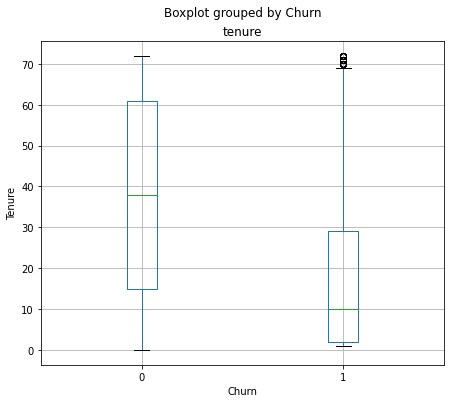

In [10]:
# checking churning range
ax = plt.figure(figsize=(7,6)).gca()
df.boxplot(column='tenure', by='Churn', ax=ax)
ax.set_ylabel('Tenure')

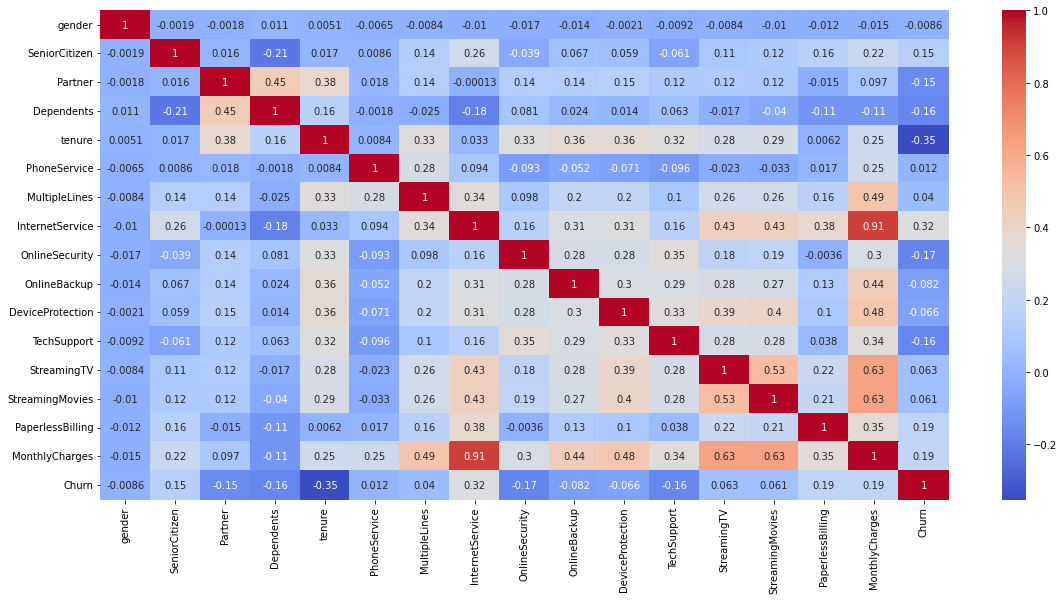

In [11]:
plt.figure(figsize=(19,9))
correlation = df.corr()
sns.heatmap(correlation,annot=True, cmap="coolwarm")

In [12]:
# importing vif metric
from statsmodels.stats.outliers_influence import variance_inflation_factor
def calc_vif(X):
    
    vif_data = pd.DataFrame()
    vif_data["feature"] = X.columns
    vif_data['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    return vif_data

In [13]:
calc_vif(df[[i for i in df.describe().columns if i not in ["Churn","InternetService","StreamingTV","StreamingMovies","PhoneService"]]])

,feature,VIF
0,gender,1.795377
1,SeniorCitizen,1.351021
2,Partner,2.812029
3,Dependents,1.865093
4,tenure,4.018527
5,MultipleLines,2.455143
6,OnlineSecurity,1.807327
7,OnlineBackup,2.062325
8,DeviceProtection,2.152582
9,TechSupport,1.885459


In [14]:
columnsTobeDropped = ['InternetService','StreamingTV','StreamingMovies','PhoneService']
copied_df = df.drop(columns=columnsTobeDropped).copy()

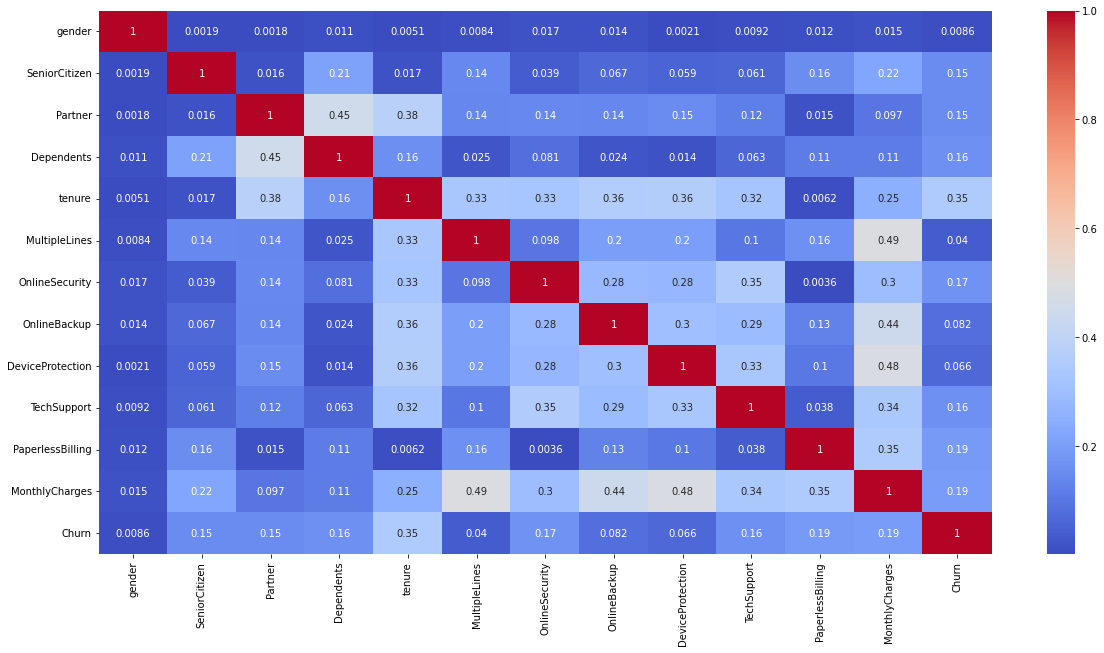

In [15]:
# correlation detection
plt.figure(figsize=(20,10))
correlation = copied_df[copied_df.describe().columns].corr()
sns.heatmap(abs(correlation),annot=True,cmap='coolwarm')

In [16]:
# numeric features
numeric_features = copied_df.describe().columns

In [17]:
# dependent variable in 'y' and independent variable in 'X'
X = copied_df[numeric_features].drop( columns= 'Churn').values
y = copied_df['Churn'].values

In [18]:
# splitting table for test and training purpose
xtrain,xtest,ytrain,ytest = train_test_split(X,y,random_state=0,test_size=.2)

## Unregularized Logistic Regression

In [19]:
# fitting Unregularized model
log_unreg = LogisticRegression()
log_unreg.fit(xtrain, ytrain)

LogisticRegression()

In [20]:
# fitting Regularize model
log_reg = LogisticRegression(C=0.17,max_iter=100)
log_reg.fit(xtrain, ytrain)

LogisticRegression(C=0.17)

In [21]:
# parameters
# print(list(copied_df.describe().columns))
# print("\n")

print("UNREGULARIZED PARAMETERS")
print("intercept : ")
print(log_unreg.intercept_)
print("coefficients : ")
print(log_unreg.coef_)

print("\n REGULARIZED PARAMETERS")
print("intercept : ")
print(log_reg.intercept_)
print("coefficients : ")
print(log_reg.coef_)

UNREGULARIZED PARAMETERS
intercept : 
[-1.83950956]
coefficients : 
[[-0.06080228  0.41491166  0.06738501 -0.35446698 -0.04836163  0.15054305
  -0.53685774 -0.30269012 -0.16458791 -0.60155713  0.50676837  0.03179239]]

 REGULARIZED PARAMETERS
intercept : 
[-1.83474094]
coefficients : 
[[-0.05863666  0.40477989  0.06124819 -0.34294049 -0.04850044  0.14985561
  -0.52037059 -0.29319348 -0.16087898 -0.58225017  0.493183    0.0317521 ]]


In [22]:
# unregularized prediction
unreg_train_pred = log_unreg.predict(xtrain)
unreg_test_pred = log_unreg.predict(xtest)

# regularized prediction
reg_train_pred = log_reg.predict(xtrain)
reg_test_pred = log_reg.predict(xtest)

In [23]:
# importing modules
from sklearn.metrics import confusion_matrix,accuracy_score,f1_score,precision_score,recall_score,roc_auc_score,log_loss

In [24]:
print("UNREGULARIZED")
print(f"train accuracy: ",accuracy_score(unreg_train_pred,ytrain))
print(f"test accuracy: ",accuracy_score(unreg_test_pred,ytest))

print("REGULARIZED")
print(f"train accuracy: ",accuracy_score(reg_train_pred,ytrain))
print(f"test accuracy: ",accuracy_score(reg_test_pred,ytest))

UNREGULARIZED
train accuracy:  0.7999645012424565
test accuracy:  0.7913413768630234
REGULARIZED
train accuracy:  0.7994320198793042
test accuracy:  0.7906316536550745


In [25]:
# unregularized confusion metrics
print("UNREGULARIZED")
print(f"train confusion matric: ",confusion_matrix(ytrain,unreg_train_pred))
print(f" test confusion metric: ",confusion_matrix(ytest,unreg_test_pred))
print('\n')
# regularized confusion metrics
print("REGULARIZED")
print(f"train confusion matric: ",confusion_matrix(ytrain,reg_train_pred))
print(f" test confusion metric: ",confusion_matrix(ytest,reg_test_pred))

UNREGULARIZED
train confusion matric:  [[3747  386]
 [ 741  760]]
 test confusion metric:  [[935 106]
 [188 180]]


REGULARIZED
train confusion matric:  [[3747  386]
 [ 744  757]]
 test confusion metric:  [[936 105]
 [190 178]]


In [26]:
# precission score
print("UNREGULARIZED")
print(f"train: ",precision_score(unreg_train_pred,ytrain))
print(f"test: ",precision_score(unreg_test_pred,ytest))

print("REGULARIZED")
print(f"train: ",precision_score(reg_train_pred,ytrain))
print(f"test: ",precision_score(reg_test_pred,ytest))

UNREGULARIZED
train:  0.5063291139240507
test:  0.4891304347826087
REGULARIZED
train:  0.5043304463690873
test:  0.483695652173913


In [27]:
# recall score
print("UNREGULARIZED")
print(f"train: ",recall_score(unreg_train_pred,ytrain))
print(f"test: ",recall_score(unreg_test_pred,ytest))

print("REGULARIZED")
print(f"train: ",recall_score(reg_train_pred,ytrain))
print(f"test: ",recall_score(reg_test_pred,ytest))

UNREGULARIZED
train:  0.6631762652705061
test:  0.6293706293706294
REGULARIZED
train:  0.6622922134733158
test:  0.6289752650176679


In [28]:
# f1score formula = 2PR/P+R

# f1score = (2*train_recall*train_precision)/(train_recall+train_precision)

In [29]:
# f1-scores
print("F1_SCORE")
print("UNREGULARIZED")
print(f"train: ",f1_score(unreg_train_pred,ytrain))
print(f"test: ",f1_score(unreg_test_pred,ytest))

print("REGULARIZED")
print(f"train: ",f1_score(reg_train_pred,ytrain))
print(f"test: ",f1_score(reg_test_pred,ytest))

F1_SCORE
UNREGULARIZED
train:  0.5742349829996223
test:  0.5504587155963303
REGULARIZED
train:  0.5726172465960665
test:  0.5468509984639016


In [30]:
# roc auc scores
print("ROC_AUC")

print("UNREGULARIZED")
print(f"train: ",roc_auc_score(unreg_train_pred,ytrain))
print(f"test: ",roc_auc_score(unreg_test_pred,ytest))

print("REGULARIZED")
print(f"train: ",roc_auc_score(reg_train_pred,ytrain))
print(f"test: ",roc_auc_score(reg_test_pred,ytest))

ROC_AUC
UNREGULARIZED
train:  0.7490346566994242
test:  0.7309809513727591
REGULARIZED
train:  0.7483137754073326
test:  0.7301181831305036


In [31]:
# log loss
print("LOG_LOSS")

print("UNREGULARIZED")
print(f"train: ",log_loss(unreg_train_pred,ytrain))
print(f"test: ",log_loss(unreg_test_pred,ytest))

print("REGULARIZED")
print(f"train: ",log_loss(reg_train_pred,ytrain))
print(f"test: ",log_loss(reg_test_pred,ytest))

LOG_LOSS
UNREGULARIZED
train:  6.909086528001441
test:  7.206920216054377
REGULARIZED
train:  6.927478208508545
test:  7.231434322221709


# Regulazation does not affect much and train, test scores are almost same without regulization hence the model is not overfitted